In [1]:
import fem2d as fem
import numpy as np
from scipy.linalg import solve_banded

# instantiate mesh
Nx = 100
Ny = 100
Lx = 1.0
Ly = 1.0

mesh = fem.TriangularMesh2D(Nx, Ny, Lx, Ly)

nodes, nx, ny = mesh.nodes, mesh.nx, mesh.ny
x = mesh.nodes[:,0].reshape(nx,ny)
y = mesh.nodes[:,1].reshape(nx,ny)

# define a 2D gaussian generator
# gaussians have voulme 1 if N=1
def generate_gauss(sigma_x, sigma_y, x0, y0, N):
    # sigma_x = 0.01
    # sigma_y = 0.01
    # x0      = 0.5
    # y0      = 0.5
    # N       = 1.0
    norm = 1.0 / (2*np.pi*sigma_x*sigma_y)
    return lambda p : norm*N*np.exp(-((p[...,0]-x0)**2/(2.0*sigma_x**2) +
                                      (p[...,1]-y0)**2/(2.0*sigma_y**2)))
# define 1/r, analytical solution
def rm1_f(p, x0, y0):
    return 1.0/(4.0*np.pi*np.sqrt((p[...,0]-x0)**2 + (p[...,1]-y0)**2))

# preapare list of parameters for the gaussians
sigma_l = [0.1, 0.01, 0.001]
x0 = y0 = 0.5
N = 1.0

# instantiate lists to hold the solutions
rm1 = rm1_f(nodes, x0, y0).reshape(ny,nx)
f = []
u = []

for sigma in sigma_l:
    gauss = generate_gauss(sigma, sigma, x0, y0, N)
    f.append(gauss(nodes).reshape(ny,nx))
    
    A_mat  = fem.stiffn(mesh)
    b_vec  = fem.fv_int(mesh, gauss)
    u.append(solve_banded((nx,nx), A_mat, b_vec).reshape(ny,nx))

/tmp/ipykernel_34646/3758241109.py:30: RuntimeWarning: divide by zero encountered in divide
  return 1.0/(4.0*np.pi*np.sqrt((p[...,0]-x0)**2 + (p[...,1]-y0)**2))


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotter3D(X, Y, Z1, Z2, Z3):
    """Plotter function for the inhomogeneity and the solution of the Poisson equation"""
    fig = plt.figure(figsize=(9.6, 3.0))
    fig.suptitle("Poisson equation", y= 0.95, fontsize=14)

    # first subplot: f(x, y), inhomogeneity of the Poisson equation
    ax = fig.add_axes((0.0, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("inhomogeneity", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "f(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z1, linewidths=0.5)

    # second subplot: u, solution of the linear system
    ax = fig.add_axes((0.31, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("solution", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.tick_params('z', pad=4)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "u(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z2, linewidths=0.5)

    ax = fig.add_axes((0.64, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("solution", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.tick_params('z', pad=4)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "1/r", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z3, linewidths=0.5)

    # plt.savefig("poisson.png")
    plt.show()

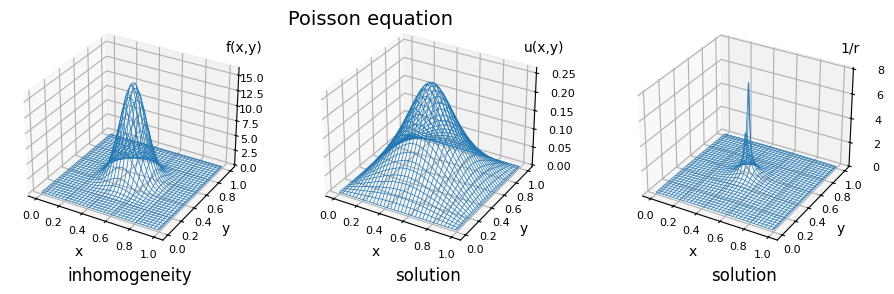

In [3]:
plotter3D(x, y, f[0], u[0], rm1)

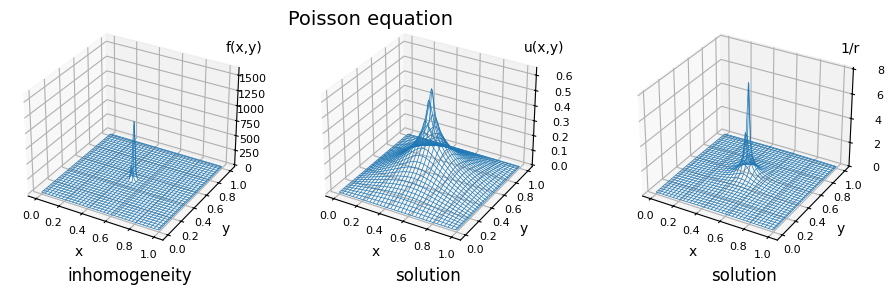

In [4]:
plotter3D(x, y, f[1], u[1], rm1)

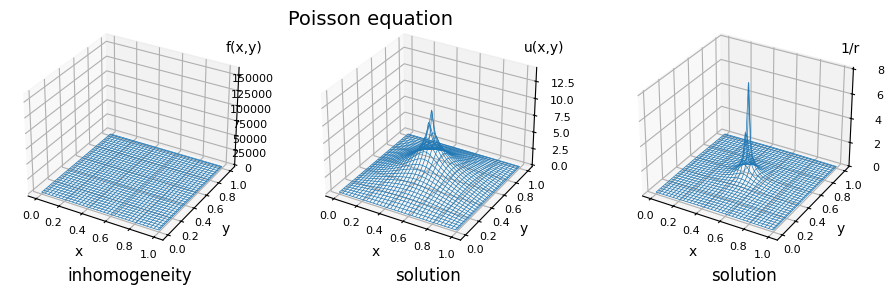

In [5]:
plotter3D(x, y, f[2], u[2], rm1)

In [6]:
def plotter2D(X, Y1, Y2, Y3):
    """2D plotter function for the inhomogeneity and the solution of the Poisson equation"""
    fig = plt.figure(figsize=(6.4, 3.0))
    # fig.suptitle("Poisson equation", y= 0.95, fontsize=14)

    # first subplot: f(x, y), inhomogeneity of the Poisson equation
    ax = fig.add_axes((0.0, 0.13, 0.5, 0.8))
    # ax.set_title("inhomogeneity", y=-0.15)
    # ax.tick_params(labelsize=8, pad=-2)
    # ax.set_xlabel('x', labelpad=-4)
    # ax.set_ylabel('y', labelpad=-4)
    ax.plot(X, Y1)

    # second plot
    ax = fig.add_axes((0.48, 0.13, 0.5, 0.8))
    # ax.set_title("solution", y=-0.15)
    # ax.tick_params(labelsize=8, pad=-2)
    # ax.tick_params('z', pad=4)
    # ax.set_xlabel('x', labelpad=-4)
    # ax.set_ylabel('y', labelpad=-4)
    ax.loglog()
    ax.plot(X, Y2)
    ax.plot(X, Y3)

    # plt.savefig("poisson.png")
    plt.show()

In [7]:
x = nodes[:,0].reshape(ny,nx)[0,:]
y = nodes[:,1].reshape(ny,nx)[int(ny/2),0]
ny
ny_h = int(ny/2)
# u[0][ny_h,:]
# u[0,ny_h,:]
# rm1[int(ny_h),:]

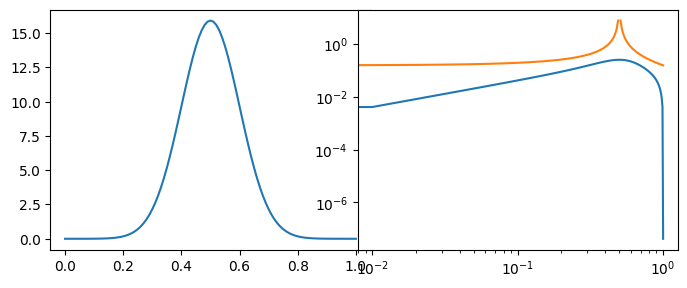

In [8]:
plotter2D(x, f[0][ny_h,:], u[0][ny_h,:], rm1[ny_h,:])

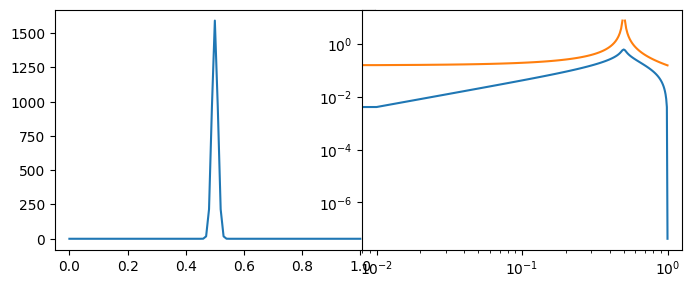

In [9]:
plotter2D(x, f[1][ny_h,:], u[1][ny_h,:], rm1[ny_h,:])

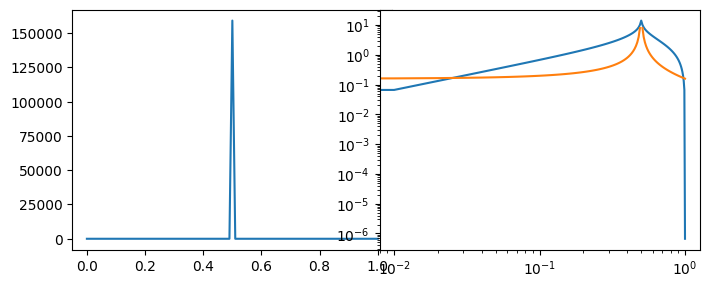

In [10]:
plotter2D(x, f[2][ny_h,:], u[2][ny_h,:], rm1[ny_h,:])